In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pandas import date_range,Series,DataFrame,read_csv, qcut
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from numpy.random import randn
from pylab import *
import brewer2mpl
import seaborn as sns
from matplotlib import rcParams
from imblearn.ensemble import EasyEnsemble
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (25, 20)  # Размер картинок

In [2]:
test_df = pd.read_csv('dataset_test.csv')
train_df = pd.read_csv('dataset_train.csv')

/home/but/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,17,23,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/but/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,7,11,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df = train_df.fillna(0)

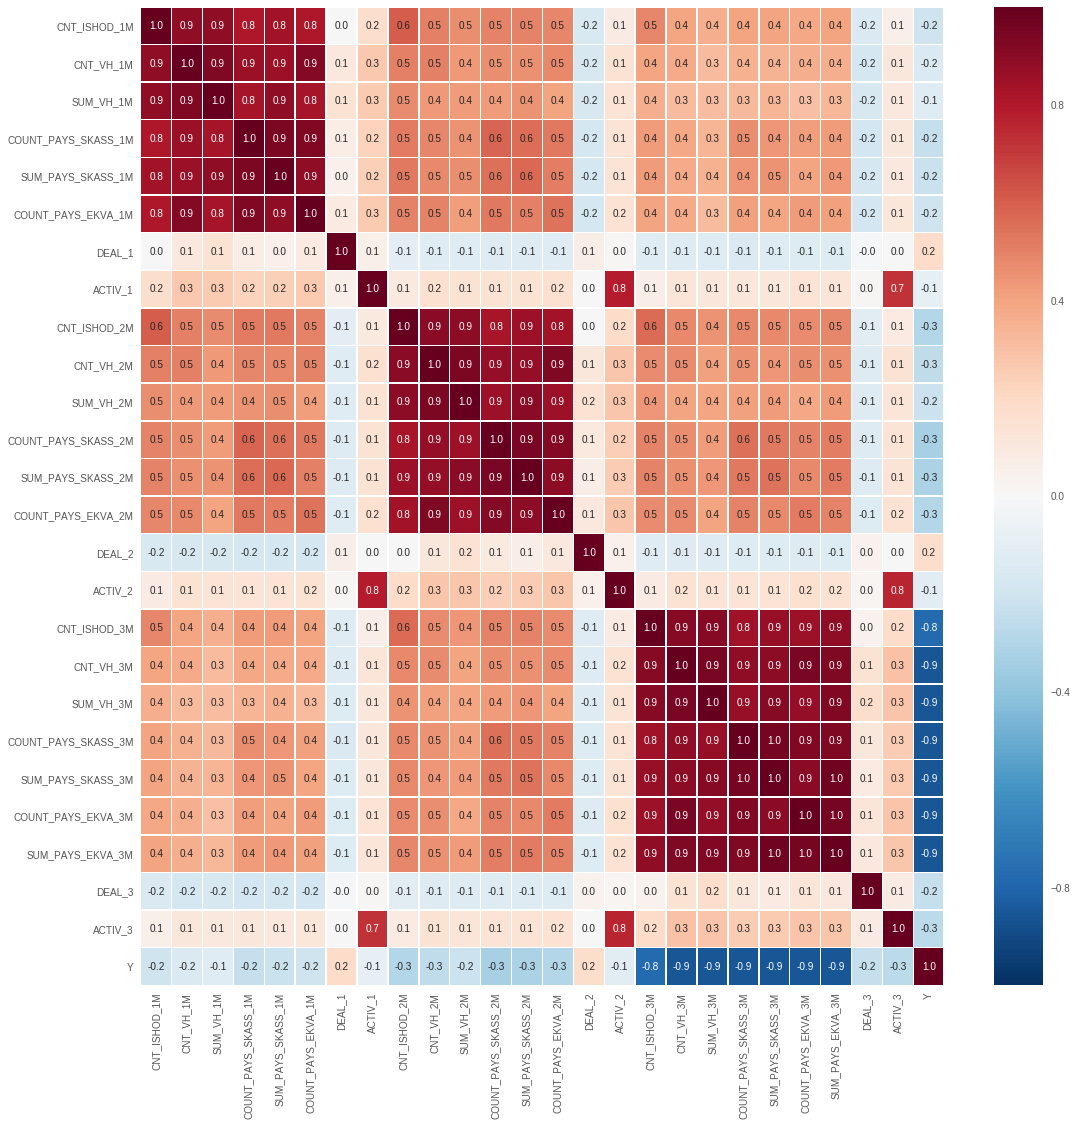

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_df.corr(method='spearman',min_periods=10), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
train_df.dtypes

CNT_ISHOD_1M           float64
SUM_ISHOD_1M            object
CNT_VH_1M              float64
SUM_VH_1M              float64
COUNT_PAYS_SKASS_1M    float64
SUM_PAYS_SKASS_1M      float64
COUNT_PAYS_EKVA_1M     float64
SUM_PAYS_EKVA_1M        object
DEAL_1                 float64
ACTIV_1                float64
CNT_ISHOD_2M           float64
SUM_ISHOD_2M            object
CNT_VH_2M              float64
SUM_VH_2M              float64
COUNT_PAYS_SKASS_2M    float64
SUM_PAYS_SKASS_2M      float64
COUNT_PAYS_EKVA_2M     float64
SUM_PAYS_EKVA_2M        object
DEAL_2                 float64
ACTIV_2                float64
CNT_ISHOD_3M           float64
SUM_ISHOD_3M            object
CNT_VH_3M              float64
SUM_VH_3M              float64
COUNT_PAYS_SKASS_3M    float64
SUM_PAYS_SKASS_3M      float64
COUNT_PAYS_EKVA_3M     float64
SUM_PAYS_EKVA_3M       float64
DEAL_3                 float64
ACTIV_3                float64
Y                        int64
dtype: object

Надо ковертировать столцы формата object в числовые

In [6]:
train_df = train_df.convert_objects(convert_numeric=True)
train_df.dtypes

/home/but/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


CNT_ISHOD_1M           float64
SUM_ISHOD_1M           float64
CNT_VH_1M              float64
SUM_VH_1M              float64
COUNT_PAYS_SKASS_1M    float64
SUM_PAYS_SKASS_1M      float64
COUNT_PAYS_EKVA_1M     float64
SUM_PAYS_EKVA_1M       float64
DEAL_1                 float64
ACTIV_1                float64
CNT_ISHOD_2M           float64
SUM_ISHOD_2M           float64
CNT_VH_2M              float64
SUM_VH_2M              float64
COUNT_PAYS_SKASS_2M    float64
SUM_PAYS_SKASS_2M      float64
COUNT_PAYS_EKVA_2M     float64
SUM_PAYS_EKVA_2M       float64
DEAL_2                 float64
ACTIV_2                float64
CNT_ISHOD_3M           float64
SUM_ISHOD_3M           float64
CNT_VH_3M              float64
SUM_VH_3M              float64
COUNT_PAYS_SKASS_3M    float64
SUM_PAYS_SKASS_3M      float64
COUNT_PAYS_EKVA_3M     float64
SUM_PAYS_EKVA_3M       float64
DEAL_3                 float64
ACTIV_3                float64
Y                        int64
dtype: object

In [7]:
#заменим NaN на 0
train_df = train_df.fillna(0)

Text(0,0.5,'$J(C_k)$')

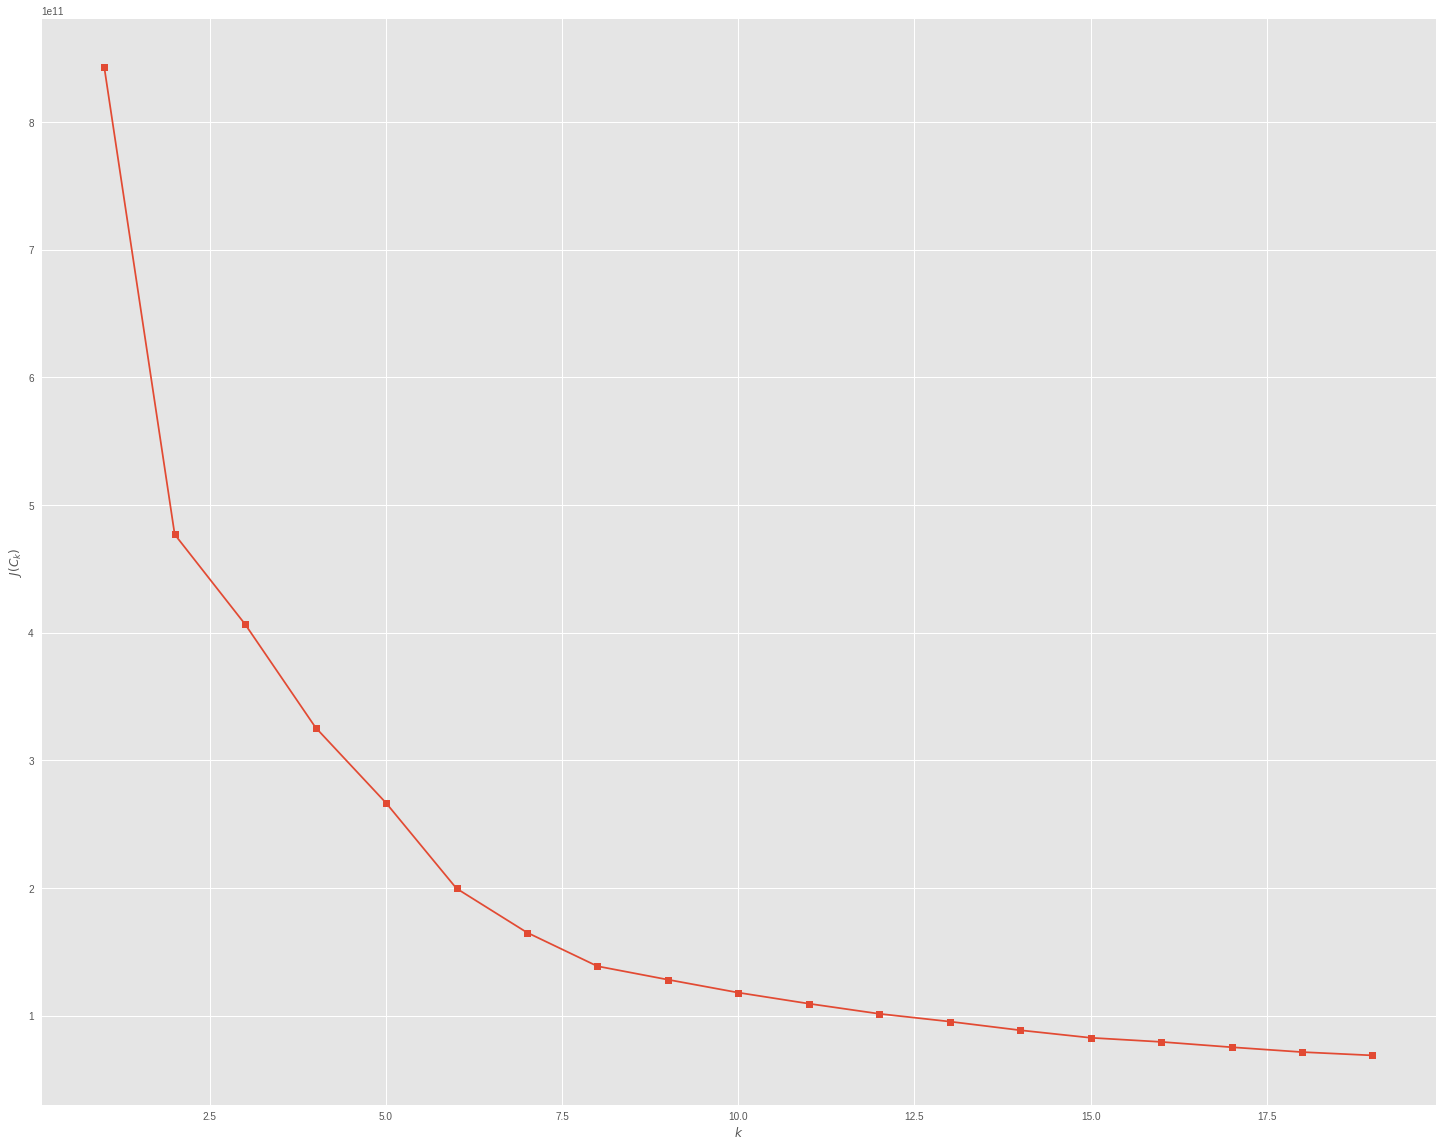

In [8]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init = 10).fit(train_df)
                                                    
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [9]:
kmeans = KMeans(n_clusters=6, n_init=10).fit(train_df.drop('Y', axis ='columns'))

In [10]:
Z = kmeans.predict(train_df.drop('Y', axis ='columns'))
train_df['Cluster'] = Z
for i in range(int(train_df['Cluster'].max())):
    print('Cluster '+ str(i) +': ' + str(len(train_df[train_df.Cluster == i])))

Cluster 0: 263025
Cluster 1: 1
Cluster 2: 1
Cluster 3: 1
Cluster 4: 1


In [11]:
neigh = KNeighborsClassifier(n_neighbors=500)

In [12]:
neigh.fit(train_df.drop(['Y', 'Cluster'], axis ='columns'), train_df['Y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=500, p=2,
           weights='uniform')

In [13]:
neigh.score(train_df.drop(['Y', 'Cluster'], axis ='columns'), train_df['Y'])

0.96291199391750615

In [14]:
test_df = test_df.convert_objects(convert_numeric=True)
test_df = test_df.fillna(0)

/home/but/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [15]:
neigh.score(test_df.drop('Y', axis = 1), test_df['Y'])

0.96023962230536253

In [16]:
pred = neigh.predict(test_df[test_df.Y == 1 ].drop('Y', axis = 1))

In [17]:
pred0 = neigh.predict(test_df[test_df.Y == 0 ].drop('Y', axis = 1))

In [18]:
print(str(len(pred[pred == 0])) + '/' + str(len(pred)))

287/76160


In [20]:
predAll = neigh.predict(test_df.drop('Y', axis = 1))


precision:


NameError: name 'precision_score' is not defined

In [22]:
print('precision:')
print(metrics.precision_score(test_df.Y, predAll))
print('recall')
print(metrics.recall_score(test_df.Y, predAll))

precision:
0.897767207412
recall
0.996231617647


In [ ]:
print(str(len(pred0[pred0 == 1])) + '/' + str(len(pred0)))

предсказал 96% верно
